# Example 3: Linear Regression model with Stochastic Gradient Descent
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [24]:
np.random.seed(1337)
np.set_printoptions(3)

In [26]:
def train_val_test_split(x, t):
    x_train_val, x_test, t_train_val, t_test = train_test_split(x, t, test_size=0.2)
    x_train, x_val, t_train, t_val = train_test_split(x_train_val, t_train_val, test_size=0.2)
    return (
        x_train, t_train,
        x_val, t_val, 
        x_test, t_test,
    )

In [27]:
n_samples = 100
w_true = np.array([1.5])  # You choose
b_true = 0.5
noise_scale = 1.0

# Generate input features
n_features = len(w_true)
x = np.random.randn(n_samples, n_features)

# Generate target values with noise
noise = np.random.randn(n_samples) * noise_scale
t = x @ w_true + b_true + noise

x_train, t_train, x_val, t_val, x_test, t_test = train_val_test_split(x, t)

In [28]:
model = SGDRegressor()

In [29]:
model.fit(x_train, t_train)
w_pred = model.coef_
b_pred = model.intercept_

In [30]:
y_test = model.predict(x_test)
mse_test = mean_squared_error(t_test, y_test)

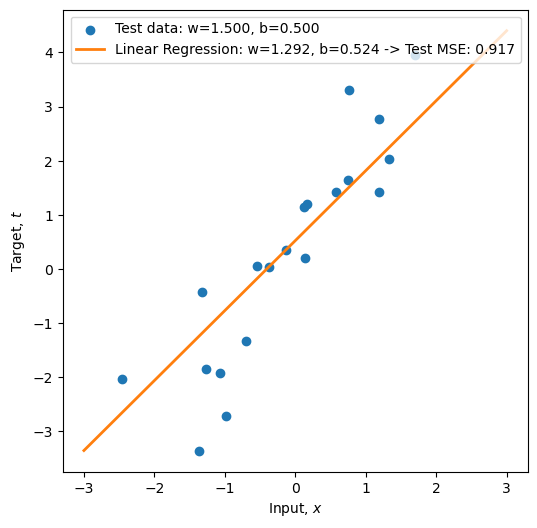

In [31]:
data_label = f'Test data: w={w_true.item():.3f}, b={b_true:.3f}'
model_label = f'Linear Regression: w={w_pred.item():.3f}, b={b_pred.item():.3f} -> Test MSE: {mse_test:.3f}'

x_vis = np.linspace(-3, 3).reshape(-1, 1)
y_vis = model.predict(x_vis)

fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(x_test, t_test, label=data_label, color='tab:blue')
ax.plot(x_vis, y_vis, label=model_label, linewidth=2, color='tab:orange')
ax.set_xlabel(r"Input, $x$")
ax.set_ylabel(r"Target, $t$")
ax.legend()